# Warsztaty Python w Data Science

***

## Data Wrangling z Biblioteką Pandas 
### Część 5 z 5 - Wszystkie sztuczki razem

---

# https://grouplens.org/datasets/movielens/

## Small: 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. Last updated 9/2018.


## Pandas Chaining

***

# https://github.com/Bits-of-Data-PL/PythonDataScience

---

In [1]:
import pandas as pd

movies = pd.read_csv('data/ml-latest-small/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [2]:
movies.genres.str.split('|')

0       [Adventure, Animation, Children, Comedy, Fantasy]
1                          [Adventure, Children, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9737                 [Action, Animation, Comedy, Fantasy]
9738                         [Animation, Comedy, Fantasy]
9739                                              [Drama]
9740                                  [Action, Animation]
9741                                             [Comedy]
Name: genres, Length: 9742, dtype: object

In [3]:
genres = movies.genres.str.split('|', expand=True)
genres

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
9737,Action,Animation,Comedy,Fantasy,None,None,None,None,None,None
9738,Animation,Comedy,Fantasy,None,None,None,None,None,None,None
9739,Drama,None,None,None,None,None,None,None,None,None
9740,Action,Animation,None,None,None,None,None,None,None,None


In [4]:
movies_with_genres = pd.concat([movies, genres], axis=1)
movies_with_genres

,movieId,title,genres,0,1,2,3,4,5,6,7,8,9
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,None,None,None,None,None,None,None,None
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,5,Father of the Bride Part II (1995),Comedy,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,Action,Animation,Comedy,Fantasy,None,None,None,None,None,None
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,Animation,Comedy,Fantasy,None,None,None,None,None,None,None
9739,193585,Flint (2017),Drama,Drama,None,None,None,None,None,None,None,None,None
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,Action,Animation,None,None,None,None,None,None,None,None


In [5]:
movies_with_genres.drop('genres', axis=1, inplace=True)
movies_with_genres

,movieId,title,0,1,2,3,4,5,6,7,8,9
0,1,Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,2,Jumanji (1995),Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,3,Grumpier Old Men (1995),Comedy,Romance,None,None,None,None,None,None,None,None
3,4,Waiting to Exhale (1995),Comedy,Drama,Romance,None,None,None,None,None,None,None
4,5,Father of the Bride Part II (1995),Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action,Animation,Comedy,Fantasy,None,None,None,None,None,None
9738,193583,No Game No Life: Zero (2017),Animation,Comedy,Fantasy,None,None,None,None,None,None,None
9739,193585,Flint (2017),Drama,None,None,None,None,None,None,None,None,None
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action,Animation,None,None,None,None,None,None,None,None


In [6]:
movies_with_genres.melt(id_vars=['movieId', 'title'], value_name='genre')

,movieId,title,variable,genre
0,1,Toy Story (1995),0,Adventure
1,2,Jumanji (1995),0,Adventure
2,3,Grumpier Old Men (1995),0,Comedy
3,4,Waiting to Exhale (1995),0,Comedy
4,5,Father of the Bride Part II (1995),0,Comedy
...,...,...,...,...
97415,193581,Black Butler: Book of the Atlantic (2017),9,None
97416,193583,No Game No Life: Zero (2017),9,None
97417,193585,Flint (2017),9,None
97418,193587,Bungo Stray Dogs: Dead Apple (2018),9,None


In [7]:
genres = movies_with_genres.melt(id_vars=['movieId', 'title'], value_name='feature').drop('variable', axis=1)
genres

,movieId,title,feature
0,1,Toy Story (1995),Adventure
1,2,Jumanji (1995),Adventure
2,3,Grumpier Old Men (1995),Comedy
3,4,Waiting to Exhale (1995),Comedy
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
97415,193581,Black Butler: Book of the Atlantic (2017),None
97416,193583,No Game No Life: Zero (2017),None
97417,193585,Flint (2017),None
97418,193587,Bungo Stray Dogs: Dead Apple (2018),None


In [8]:
genres[genres.movieId==1]

,movieId,title,feature
0,1,Toy Story (1995),Adventure
9742,1,Toy Story (1995),Animation
19484,1,Toy Story (1995),Children
29226,1,Toy Story (1995),Comedy
38968,1,Toy Story (1995),Fantasy
48710,1,Toy Story (1995),None
58452,1,Toy Story (1995),None
68194,1,Toy Story (1995),None
77936,1,Toy Story (1995),None
87678,1,Toy Story (1995),None


In [9]:
movies_with_genres.melt(id_vars=['movieId', 'title'], value_name='feature').drop('variable', axis=1).dropna().reset_index(drop=True)

,movieId,title,feature
0,1,Toy Story (1995),Adventure
1,2,Jumanji (1995),Adventure
2,3,Grumpier Old Men (1995),Comedy
3,4,Waiting to Exhale (1995),Comedy
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
22079,85261,Mars Needs Moms (2011),IMAX
22080,26701,Patlabor: The Movie (Kidô keisatsu patorebâ: T...,Thriller
22081,81132,Rubber (2010),Mystery
22082,81132,Rubber (2010),Thriller


In [10]:
ratings = pd.read_csv('data/ml-latest-small/ratings.csv')
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


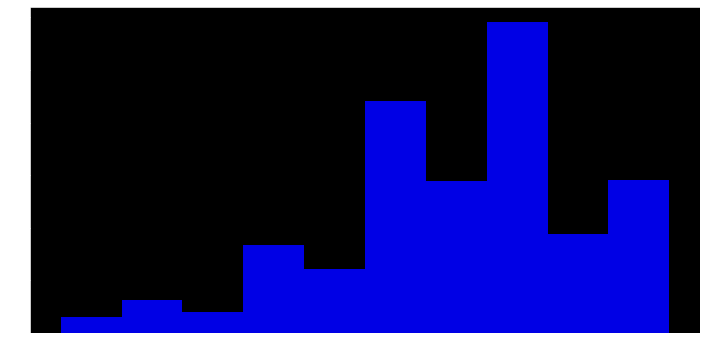

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.style.use("dark_background")

plt.hist(ratings['rating'], 10,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.9)

plt.show()

In [12]:
ratings = ratings.drop('timestamp', axis=1)

In [13]:
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [15]:
melted_movies_with_genres = movies_with_genres.melt(id_vars=['movieId', 'title'], value_name='feature').drop(['variable', 'title'], axis=1).dropna().reset_index(drop=True)

ratings_and_movies = pd.merge(ratings, melted_movies_with_genres, on='movieId', how='inner')
ratings_and_movies

,userId,movieId,rating,feature
0,1,1,4.0,Adventure
1,1,1,4.0,Animation
2,1,1,4.0,Children
3,1,1,4.0,Comedy
4,1,1,4.0,Fantasy
...,...,...,...,...
274475,610,160836,3.0,Drama
274476,610,160836,3.0,Thriller
274477,610,163937,3.5,Horror
274478,610,163937,3.5,Thriller


In [17]:
grouped_features = ratings_and_movies.drop('movieId', axis=1).groupby(['userId', 'feature']).sum()
grouped_features

rating
userId feature          
1      Action      389.0
       Adventure   373.0
       Animation   136.0
       Children    191.0
       Comedy      355.0
...                  ...
610    Romance     444.0
       Sci-Fi      918.5
       Thriller   1822.5
       War         177.5
       Western     123.5

[10027 rows x 1 columns]

In [18]:
grouped_features.reset_index(inplace=True)

In [ ]:
df.columns

In [19]:
grouped_features.pivot(index='userId', columns=['feature'])['rating']

feature,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,
1,NaN,389.0,373.0,136.0,191.0,355.0,196.0,NaN,308.0,202.0,5.0,59.0,NaN,103.0,75.0,112.0,169.0,228.0,99.0,30.0
2,NaN,43.5,12.5,NaN,NaN,28.0,38.0,13.0,66.0,NaN,NaN,3.0,15.0,NaN,8.0,4.5,15.5,37.0,4.5,3.5
3,NaN,50.0,30.0,2.0,2.5,9.0,1.0,NaN,12.0,13.5,NaN,37.5,NaN,0.5,5.0,2.5,63.0,29.0,2.5,NaN
4,NaN,83.0,106.0,24.0,38.0,365.0,103.0,8.0,418.0,70.0,16.0,17.0,3.0,64.0,80.0,196.0,34.0,135.0,25.0,38.0
5,NaN,28.0,26.0,26.0,37.0,52.0,46.0,NaN,95.0,29.0,NaN,3.0,11.0,22.0,4.0,34.0,5.0,32.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,480.0,515.0,156.0,169.0,1501.0,486.0,19.0,2644.0,349.0,30.5,174.0,49.0,164.0,345.0,1328.0,281.0,701.5,246.5,58.0
607,NaN,268.0,156.0,20.0,65.0,183.0,103.0,NaN,329.0,75.0,NaN,144.0,5.0,18.0,79.0,102.0,117.0,251.0,25.0,8.0
608,NaN,922.5,583.0,171.5,216.5,971.5,527.5,18.0,962.5,333.0,15.0,322.0,48.0,91.0,245.0,306.0,550.5,916.0,68.0,29.0


In [20]:
grouped_features.pivot(index='userId', columns=['feature'])['rating'].fillna(0).reset_index()

feature,userId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0.0,389.0,373.0,136.0,191.0,355.0,196.0,0.0,308.0,...,5.0,59.0,0.0,103.0,75.0,112.0,169.0,228.0,99.0,30.0
1,2,0.0,43.5,12.5,0.0,0.0,28.0,38.0,13.0,66.0,...,0.0,3.0,15.0,0.0,8.0,4.5,15.5,37.0,4.5,3.5
2,3,0.0,50.0,30.0,2.0,2.5,9.0,1.0,0.0,12.0,...,0.0,37.5,0.0,0.5,5.0,2.5,63.0,29.0,2.5,0.0
3,4,0.0,83.0,106.0,24.0,38.0,365.0,103.0,8.0,418.0,...,16.0,17.0,3.0,64.0,80.0,196.0,34.0,135.0,25.0,38.0
4,5,0.0,28.0,26.0,26.0,37.0,52.0,46.0,0.0,95.0,...,0.0,3.0,11.0,22.0,4.0,34.0,5.0,32.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,0.0,480.0,515.0,156.0,169.0,1501.0,486.0,19.0,2644.0,...,30.5,174.0,49.0,164.0,345.0,1328.0,281.0,701.5,246.5,58.0
606,607,0.0,268.0,156.0,20.0,65.0,183.0,103.0,0.0,329.0,...,0.0,144.0,5.0,18.0,79.0,102.0,117.0,251.0,25.0,8.0
607,608,0.0,922.5,583.0,171.5,216.5,971.5,527.5,18.0,962.5,...,15.0,322.0,48.0,91.0,245.0,306.0,550.5,916.0,68.0,29.0
608,609,0.0,34.0,32.0,3.0,6.0,23.0,21.0,6.0,64.0,...,0.0,7.0,3.0,0.0,0.0,16.0,15.0,46.0,14.0,4.0


In [21]:
df = grouped_features.reset_index().pivot(index='userId', columns=['feature'])['rating'].fillna(0).reset_index()
df

feature,userId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0.0,389.0,373.0,136.0,191.0,355.0,196.0,0.0,308.0,...,5.0,59.0,0.0,103.0,75.0,112.0,169.0,228.0,99.0,30.0
1,2,0.0,43.5,12.5,0.0,0.0,28.0,38.0,13.0,66.0,...,0.0,3.0,15.0,0.0,8.0,4.5,15.5,37.0,4.5,3.5
2,3,0.0,50.0,30.0,2.0,2.5,9.0,1.0,0.0,12.0,...,0.0,37.5,0.0,0.5,5.0,2.5,63.0,29.0,2.5,0.0
3,4,0.0,83.0,106.0,24.0,38.0,365.0,103.0,8.0,418.0,...,16.0,17.0,3.0,64.0,80.0,196.0,34.0,135.0,25.0,38.0
4,5,0.0,28.0,26.0,26.0,37.0,52.0,46.0,0.0,95.0,...,0.0,3.0,11.0,22.0,4.0,34.0,5.0,32.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,0.0,480.0,515.0,156.0,169.0,1501.0,486.0,19.0,2644.0,...,30.5,174.0,49.0,164.0,345.0,1328.0,281.0,701.5,246.5,58.0
606,607,0.0,268.0,156.0,20.0,65.0,183.0,103.0,0.0,329.0,...,0.0,144.0,5.0,18.0,79.0,102.0,117.0,251.0,25.0,8.0
607,608,0.0,922.5,583.0,171.5,216.5,971.5,527.5,18.0,962.5,...,15.0,322.0,48.0,91.0,245.0,306.0,550.5,916.0,68.0,29.0
608,609,0.0,34.0,32.0,3.0,6.0,23.0,21.0,6.0,64.0,...,0.0,7.0,3.0,0.0,0.0,16.0,15.0,46.0,14.0,4.0


In [22]:
df["total"] = df.drop("userId", axis=1).sum(axis=1)

In [23]:
df

feature,userId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
0,1,0.0,389.0,373.0,136.0,191.0,355.0,196.0,0.0,308.0,...,59.0,0.0,103.0,75.0,112.0,169.0,228.0,99.0,30.0,3030.0
1,2,0.0,43.5,12.5,0.0,0.0,28.0,38.0,13.0,66.0,...,3.0,15.0,0.0,8.0,4.5,15.5,37.0,4.5,3.5,292.0
2,3,0.0,50.0,30.0,2.0,2.5,9.0,1.0,0.0,12.0,...,37.5,0.0,0.5,5.0,2.5,63.0,29.0,2.5,0.0,260.0
3,4,0.0,83.0,106.0,24.0,38.0,365.0,103.0,8.0,418.0,...,17.0,3.0,64.0,80.0,196.0,34.0,135.0,25.0,38.0,1823.0
4,5,0.0,28.0,26.0,26.0,37.0,52.0,46.0,0.0,95.0,...,3.0,11.0,22.0,4.0,34.0,5.0,32.0,10.0,6.0,466.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,0.0,480.0,515.0,156.0,169.0,1501.0,486.0,19.0,2644.0,...,174.0,49.0,164.0,345.0,1328.0,281.0,701.5,246.5,58.0,9696.5
606,607,0.0,268.0,156.0,20.0,65.0,183.0,103.0,0.0,329.0,...,144.0,5.0,18.0,79.0,102.0,117.0,251.0,25.0,8.0,1948.0
607,608,0.0,922.5,583.0,171.5,216.5,971.5,527.5,18.0,962.5,...,322.0,48.0,91.0,245.0,306.0,550.5,916.0,68.0,29.0,7296.5
608,609,0.0,34.0,32.0,3.0,6.0,23.0,21.0,6.0,64.0,...,7.0,3.0,0.0,0.0,16.0,15.0,46.0,14.0,4.0,297.0


In [24]:
df.iloc[:,1:] = df.iloc[:,1:].div(df.total, axis=0)

In [25]:
df

feature,userId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
0,1,0.0,0.128383,0.123102,0.044884,0.063036,0.117162,0.064686,0.000000,0.101650,...,0.019472,0.000000,0.033993,0.024752,0.036964,0.055776,0.075248,0.032673,0.009901,1.0
1,2,0.0,0.148973,0.042808,0.000000,0.000000,0.095890,0.130137,0.044521,0.226027,...,0.010274,0.051370,0.000000,0.027397,0.015411,0.053082,0.126712,0.015411,0.011986,1.0
2,3,0.0,0.192308,0.115385,0.007692,0.009615,0.034615,0.003846,0.000000,0.046154,...,0.144231,0.000000,0.001923,0.019231,0.009615,0.242308,0.111538,0.009615,0.000000,1.0
3,4,0.0,0.045529,0.058146,0.013165,0.020845,0.200219,0.056500,0.004388,0.229292,...,0.009325,0.001646,0.035107,0.043884,0.107515,0.018651,0.074054,0.013714,0.020845,1.0
4,5,0.0,0.060086,0.055794,0.055794,0.079399,0.111588,0.098712,0.000000,0.203863,...,0.006438,0.023605,0.047210,0.008584,0.072961,0.010730,0.068670,0.021459,0.012876,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,0.0,0.049502,0.053112,0.016088,0.017429,0.154798,0.050121,0.001959,0.272676,...,0.017945,0.005053,0.016913,0.035580,0.136957,0.028980,0.072346,0.025422,0.005982,1.0
606,607,0.0,0.137577,0.080082,0.010267,0.033368,0.093943,0.052875,0.000000,0.168891,...,0.073922,0.002567,0.009240,0.040554,0.052361,0.060062,0.128850,0.012834,0.004107,1.0
607,608,0.0,0.126430,0.079901,0.023504,0.029672,0.133146,0.072295,0.002467,0.131913,...,0.044131,0.006578,0.012472,0.033578,0.041938,0.075447,0.125540,0.009320,0.003975,1.0
608,609,0.0,0.114478,0.107744,0.010101,0.020202,0.077441,0.070707,0.020202,0.215488,...,0.023569,0.010101,0.000000,0.000000,0.053872,0.050505,0.154882,0.047138,0.013468,1.0


In [26]:
user2 = df[df.userId==2].melt().drop(df. index[0])
user2.style.format({'value':'{:,.2%}'})

,feature,value
1,(no genres listed),0.00%
2,Action,14.90%
3,Adventure,4.28%
4,Animation,0.00%
5,Children,0.00%
6,Comedy,9.59%
7,Crime,13.01%
8,Documentary,4.45%
9,Drama,22.60%
10,Fantasy,0.00%


---

# Pandas Chaining

In [27]:
grouped_features.reset_index().pivot(index='userId', columns=['feature'])['rating'].fillna(0).reset_index().assign(total=lambda d: d.drop("userId", axis=1).sum(axis=1))

feature,userId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
0,1,0.0,389.0,373.0,136.0,191.0,355.0,196.0,0.0,308.0,...,59.0,0.0,103.0,75.0,112.0,169.0,228.0,99.0,30.0,3030.0
1,2,0.0,43.5,12.5,0.0,0.0,28.0,38.0,13.0,66.0,...,3.0,15.0,0.0,8.0,4.5,15.5,37.0,4.5,3.5,292.0
2,3,0.0,50.0,30.0,2.0,2.5,9.0,1.0,0.0,12.0,...,37.5,0.0,0.5,5.0,2.5,63.0,29.0,2.5,0.0,260.0
3,4,0.0,83.0,106.0,24.0,38.0,365.0,103.0,8.0,418.0,...,17.0,3.0,64.0,80.0,196.0,34.0,135.0,25.0,38.0,1823.0
4,5,0.0,28.0,26.0,26.0,37.0,52.0,46.0,0.0,95.0,...,3.0,11.0,22.0,4.0,34.0,5.0,32.0,10.0,6.0,466.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,0.0,480.0,515.0,156.0,169.0,1501.0,486.0,19.0,2644.0,...,174.0,49.0,164.0,345.0,1328.0,281.0,701.5,246.5,58.0,9696.5
606,607,0.0,268.0,156.0,20.0,65.0,183.0,103.0,0.0,329.0,...,144.0,5.0,18.0,79.0,102.0,117.0,251.0,25.0,8.0,1948.0
607,608,0.0,922.5,583.0,171.5,216.5,971.5,527.5,18.0,962.5,...,322.0,48.0,91.0,245.0,306.0,550.5,916.0,68.0,29.0,7296.5
608,609,0.0,34.0,32.0,3.0,6.0,23.0,21.0,6.0,64.0,...,7.0,3.0,0.0,0.0,16.0,15.0,46.0,14.0,4.0,297.0


In [28]:
grouped_features.reset_index(
               ).pivot(index='userId', columns=['feature'])['rating']\
                .fillna(0
               ).reset_index(
               ).assign(total=lambda d: d.drop("userId", axis=1).sum(axis=1)
               ).set_index('userId'
               ).pipe(lambda df: df.iloc[:,1:].div(df.total, axis=0)
               ).reset_index()

feature,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
0,1,0.128383,0.123102,0.044884,0.063036,0.117162,0.064686,0.000000,0.101650,0.066667,...,0.019472,0.000000,0.033993,0.024752,0.036964,0.055776,0.075248,0.032673,0.009901,1.0
1,2,0.148973,0.042808,0.000000,0.000000,0.095890,0.130137,0.044521,0.226027,0.000000,...,0.010274,0.051370,0.000000,0.027397,0.015411,0.053082,0.126712,0.015411,0.011986,1.0
2,3,0.192308,0.115385,0.007692,0.009615,0.034615,0.003846,0.000000,0.046154,0.051923,...,0.144231,0.000000,0.001923,0.019231,0.009615,0.242308,0.111538,0.009615,0.000000,1.0
3,4,0.045529,0.058146,0.013165,0.020845,0.200219,0.056500,0.004388,0.229292,0.038398,...,0.009325,0.001646,0.035107,0.043884,0.107515,0.018651,0.074054,0.013714,0.020845,1.0
4,5,0.060086,0.055794,0.055794,0.079399,0.111588,0.098712,0.000000,0.203863,0.062232,...,0.006438,0.023605,0.047210,0.008584,0.072961,0.010730,0.068670,0.021459,0.012876,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,0.049502,0.053112,0.016088,0.017429,0.154798,0.050121,0.001959,0.272676,0.035992,...,0.017945,0.005053,0.016913,0.035580,0.136957,0.028980,0.072346,0.025422,0.005982,1.0
606,607,0.137577,0.080082,0.010267,0.033368,0.093943,0.052875,0.000000,0.168891,0.038501,...,0.073922,0.002567,0.009240,0.040554,0.052361,0.060062,0.128850,0.012834,0.004107,1.0
607,608,0.126430,0.079901,0.023504,0.029672,0.133146,0.072295,0.002467,0.131913,0.045638,...,0.044131,0.006578,0.012472,0.033578,0.041938,0.075447,0.125540,0.009320,0.003975,1.0
608,609,0.114478,0.107744,0.010101,0.020202,0.077441,0.070707,0.020202,0.215488,0.010101,...,0.023569,0.010101,0.000000,0.000000,0.053872,0.050505,0.154882,0.047138,0.013468,1.0


In [29]:
(grouped_features
               .reset_index()
               .pivot(index='userId', columns=['feature'])['rating']
               .fillna(0)
               .reset_index()
               .assign(total=lambda d: d.drop("userId", axis=1)
                                        .sum(axis=1))
               .set_index('userId')
               .pipe(lambda df: df.iloc[:,1:].div(df.total, axis=0))
               .reset_index())

feature,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
0,1,0.128383,0.123102,0.044884,0.063036,0.117162,0.064686,0.000000,0.101650,0.066667,...,0.019472,0.000000,0.033993,0.024752,0.036964,0.055776,0.075248,0.032673,0.009901,1.0
1,2,0.148973,0.042808,0.000000,0.000000,0.095890,0.130137,0.044521,0.226027,0.000000,...,0.010274,0.051370,0.000000,0.027397,0.015411,0.053082,0.126712,0.015411,0.011986,1.0
2,3,0.192308,0.115385,0.007692,0.009615,0.034615,0.003846,0.000000,0.046154,0.051923,...,0.144231,0.000000,0.001923,0.019231,0.009615,0.242308,0.111538,0.009615,0.000000,1.0
3,4,0.045529,0.058146,0.013165,0.020845,0.200219,0.056500,0.004388,0.229292,0.038398,...,0.009325,0.001646,0.035107,0.043884,0.107515,0.018651,0.074054,0.013714,0.020845,1.0
4,5,0.060086,0.055794,0.055794,0.079399,0.111588,0.098712,0.000000,0.203863,0.062232,...,0.006438,0.023605,0.047210,0.008584,0.072961,0.010730,0.068670,0.021459,0.012876,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,0.049502,0.053112,0.016088,0.017429,0.154798,0.050121,0.001959,0.272676,0.035992,...,0.017945,0.005053,0.016913,0.035580,0.136957,0.028980,0.072346,0.025422,0.005982,1.0
606,607,0.137577,0.080082,0.010267,0.033368,0.093943,0.052875,0.000000,0.168891,0.038501,...,0.073922,0.002567,0.009240,0.040554,0.052361,0.060062,0.128850,0.012834,0.004107,1.0
607,608,0.126430,0.079901,0.023504,0.029672,0.133146,0.072295,0.002467,0.131913,0.045638,...,0.044131,0.006578,0.012472,0.033578,0.041938,0.075447,0.125540,0.009320,0.003975,1.0
608,609,0.114478,0.107744,0.010101,0.020202,0.077441,0.070707,0.020202,0.215488,0.010101,...,0.023569,0.010101,0.000000,0.000000,0.053872,0.050505,0.154882,0.047138,0.013468,1.0


In [31]:
(ratings_and_movies.drop('movieId', axis=1)
                        .groupby(['userId', 'feature'])
                        .sum()
                        .reset_index()
                        .pivot(index='userId', columns=['feature'])['rating']
                        .fillna(0)
                        .reset_index()
                        .assign(total=lambda d: d.drop("userId", axis=1)
                                                 .sum(axis=1))
                        .set_index('userId')
                        .pipe(lambda df: df.iloc[:,1:]
                                           .div(df.total, axis=0))
                        .reset_index())

feature,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
0,1,0.128383,0.123102,0.044884,0.063036,0.117162,0.064686,0.000000,0.101650,0.066667,...,0.019472,0.000000,0.033993,0.024752,0.036964,0.055776,0.075248,0.032673,0.009901,1.0
1,2,0.148973,0.042808,0.000000,0.000000,0.095890,0.130137,0.044521,0.226027,0.000000,...,0.010274,0.051370,0.000000,0.027397,0.015411,0.053082,0.126712,0.015411,0.011986,1.0
2,3,0.192308,0.115385,0.007692,0.009615,0.034615,0.003846,0.000000,0.046154,0.051923,...,0.144231,0.000000,0.001923,0.019231,0.009615,0.242308,0.111538,0.009615,0.000000,1.0
3,4,0.045529,0.058146,0.013165,0.020845,0.200219,0.056500,0.004388,0.229292,0.038398,...,0.009325,0.001646,0.035107,0.043884,0.107515,0.018651,0.074054,0.013714,0.020845,1.0
4,5,0.060086,0.055794,0.055794,0.079399,0.111588,0.098712,0.000000,0.203863,0.062232,...,0.006438,0.023605,0.047210,0.008584,0.072961,0.010730,0.068670,0.021459,0.012876,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,0.049502,0.053112,0.016088,0.017429,0.154798,0.050121,0.001959,0.272676,0.035992,...,0.017945,0.005053,0.016913,0.035580,0.136957,0.028980,0.072346,0.025422,0.005982,1.0
606,607,0.137577,0.080082,0.010267,0.033368,0.093943,0.052875,0.000000,0.168891,0.038501,...,0.073922,0.002567,0.009240,0.040554,0.052361,0.060062,0.128850,0.012834,0.004107,1.0
607,608,0.126430,0.079901,0.023504,0.029672,0.133146,0.072295,0.002467,0.131913,0.045638,...,0.044131,0.006578,0.012472,0.033578,0.041938,0.075447,0.125540,0.009320,0.003975,1.0
608,609,0.114478,0.107744,0.010101,0.020202,0.077441,0.070707,0.020202,0.215488,0.010101,...,0.023569,0.010101,0.000000,0.000000,0.053872,0.050505,0.154882,0.047138,0.013468,1.0


In [32]:
(pd.merge(
    pd.read_csv('data/ml-latest-small/ratings.csv').drop("timestamp", axis=1), 
    melted_movies_with_genres, on='movieId', how='inner'
  ).drop('movieId', axis=1)
   .groupby(['userId', 'feature'])
   .sum()
   .reset_index()
   .pivot(index='userId', columns=['feature'])['rating']
   .fillna(0)
   .reset_index()
   .assign(total=lambda d: d.drop("userId", axis=1)
                            .sum(axis=1)
   ).set_index('userId')
    .pipe(lambda df: df.iloc[:,1:]
                       .div(df.total, axis=0))
    .reset_index())

feature,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
0,1,0.128383,0.123102,0.044884,0.063036,0.117162,0.064686,0.000000,0.101650,0.066667,...,0.019472,0.000000,0.033993,0.024752,0.036964,0.055776,0.075248,0.032673,0.009901,1.0
1,2,0.148973,0.042808,0.000000,0.000000,0.095890,0.130137,0.044521,0.226027,0.000000,...,0.010274,0.051370,0.000000,0.027397,0.015411,0.053082,0.126712,0.015411,0.011986,1.0
2,3,0.192308,0.115385,0.007692,0.009615,0.034615,0.003846,0.000000,0.046154,0.051923,...,0.144231,0.000000,0.001923,0.019231,0.009615,0.242308,0.111538,0.009615,0.000000,1.0
3,4,0.045529,0.058146,0.013165,0.020845,0.200219,0.056500,0.004388,0.229292,0.038398,...,0.009325,0.001646,0.035107,0.043884,0.107515,0.018651,0.074054,0.013714,0.020845,1.0
4,5,0.060086,0.055794,0.055794,0.079399,0.111588,0.098712,0.000000,0.203863,0.062232,...,0.006438,0.023605,0.047210,0.008584,0.072961,0.010730,0.068670,0.021459,0.012876,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,0.049502,0.053112,0.016088,0.017429,0.154798,0.050121,0.001959,0.272676,0.035992,...,0.017945,0.005053,0.016913,0.035580,0.136957,0.028980,0.072346,0.025422,0.005982,1.0
606,607,0.137577,0.080082,0.010267,0.033368,0.093943,0.052875,0.000000,0.168891,0.038501,...,0.073922,0.002567,0.009240,0.040554,0.052361,0.060062,0.128850,0.012834,0.004107,1.0
607,608,0.126430,0.079901,0.023504,0.029672,0.133146,0.072295,0.002467,0.131913,0.045638,...,0.044131,0.006578,0.012472,0.033578,0.041938,0.075447,0.125540,0.009320,0.003975,1.0
608,609,0.114478,0.107744,0.010101,0.020202,0.077441,0.070707,0.020202,0.215488,0.010101,...,0.023569,0.010101,0.000000,0.000000,0.053872,0.050505,0.154882,0.047138,0.013468,1.0


In [33]:
(pd.merge(
    pd.read_csv('data/ml-latest-small/ratings.csv').drop("timestamp", axis=1), 
    pd.concat([movies, movies.genres.str.split('|', expand=True)], axis=1)
             .drop('genres', axis=1)
             .melt(id_vars=['movieId', 'title'], value_name='feature')
             .drop(['variable', 'title'], axis=1)
             .dropna()
             .reset_index(drop=True), on='movieId', how='inner'
)
  .drop('movieId', axis=1)
  .groupby(['userId', 'feature'])
  .sum()
  .reset_index()
  .pivot(index='userId', columns=['feature'])['rating']
  .fillna(0)
  .reset_index()
  .assign(total=lambda d: d.drop("userId", axis=1)
                           .sum(axis=1))
  .set_index('userId')
  .pipe(lambda df: df.iloc[:,1:]
                     .div(df.total, axis=0))
  .reset_index()
)

feature,userId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
0,1,0.128383,0.123102,0.044884,0.063036,0.117162,0.064686,0.000000,0.101650,0.066667,...,0.019472,0.000000,0.033993,0.024752,0.036964,0.055776,0.075248,0.032673,0.009901,1.0
1,2,0.148973,0.042808,0.000000,0.000000,0.095890,0.130137,0.044521,0.226027,0.000000,...,0.010274,0.051370,0.000000,0.027397,0.015411,0.053082,0.126712,0.015411,0.011986,1.0
2,3,0.192308,0.115385,0.007692,0.009615,0.034615,0.003846,0.000000,0.046154,0.051923,...,0.144231,0.000000,0.001923,0.019231,0.009615,0.242308,0.111538,0.009615,0.000000,1.0
3,4,0.045529,0.058146,0.013165,0.020845,0.200219,0.056500,0.004388,0.229292,0.038398,...,0.009325,0.001646,0.035107,0.043884,0.107515,0.018651,0.074054,0.013714,0.020845,1.0
4,5,0.060086,0.055794,0.055794,0.079399,0.111588,0.098712,0.000000,0.203863,0.062232,...,0.006438,0.023605,0.047210,0.008584,0.072961,0.010730,0.068670,0.021459,0.012876,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,0.049502,0.053112,0.016088,0.017429,0.154798,0.050121,0.001959,0.272676,0.035992,...,0.017945,0.005053,0.016913,0.035580,0.136957,0.028980,0.072346,0.025422,0.005982,1.0
606,607,0.137577,0.080082,0.010267,0.033368,0.093943,0.052875,0.000000,0.168891,0.038501,...,0.073922,0.002567,0.009240,0.040554,0.052361,0.060062,0.128850,0.012834,0.004107,1.0
607,608,0.126430,0.079901,0.023504,0.029672,0.133146,0.072295,0.002467,0.131913,0.045638,...,0.044131,0.006578,0.012472,0.033578,0.041938,0.075447,0.125540,0.009320,0.003975,1.0
608,609,0.114478,0.107744,0.010101,0.020202,0.077441,0.070707,0.020202,0.215488,0.010101,...,0.023569,0.010101,0.000000,0.000000,0.053872,0.050505,0.154882,0.047138,0.013468,1.0


In [34]:
pd.read_csv('data/ml-latest-small/ratings.csv').drop("timestamp", axis=1)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [35]:
df = pd.read_csv('data/ml-latest-small/ratings.csv')
df.drop("timestamp", axis=1, inplace=True)
df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0
